# 6.6: Sourcing & Analyzing Time Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the RDC_inventory_by_month_updated_1 Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Real Estate Price Prediction'

In [4]:
#Import RDC_inventory_by_month_updated_1.pkl
df_inventory_by_month_updated=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'RDC_inventory_by_month_updated_1.pkl'))

In [5]:
df_inventory_by_month_updated.shape

(2547959, 15)

In [6]:
df_inventory_by_month_updated.columns

Index(['month_date_yyyymm', 'ZCTA5CE20', 'city_state', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count',
       'days_on_market_category'],
      dtype='object')

In [7]:
df_inventory_by_month_updated.rename(columns = {'ZCTA5CE20' : 'zipcode'}, inplace = True)

In [8]:
df_inventory_by_month_updated.rename(columns = {'month_date_yyyymm' : 'yyyy_mm'}, inplace = True)

In [9]:
df_inventory_by_month_updated.head()

,yyyy_mm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,days_on_market_category
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,19.93114,96.0,824.0,74000.0,2.0,high_days_on_market
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,19.93114,29.0,947.0,130056.0,8.0,high_days_on_market
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.00000,178.0,907.0,207661.0,7.0,high_days_on_market
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.00000,91.0,903.0,84875.0,1.0,high_days_on_market
5,202401,71841,"gillham, ar",293750.0,2.0,25.0,2.0,0.0,0.0,19.93114,205.0,1532.0,306250.0,2.0,medium_days_on_market


In [10]:
df_inventory_by_month_updated.dtypes

yyyy_mm                                  object
zipcode                                  object
city_state                               object
median_listing_price                    float64
active_listing_count                    float64
median_days_on_market                   float64
new_listing_count                       float64
price_increased_count                   float64
price_reduced_count                     float64
pending_listing_count                   float64
median_listing_price_per_square_foot    float64
median_square_feet                      float64
average_listing_price                   float64
total_listing_count                     float64
days_on_market_category                  object
dtype: object

In [11]:
by_zip = df_inventory_by_month_updated.groupby(['yyyy_mm','zipcode','median_listing_price'], as_index=False)['median_listing_price'].median()

In [12]:
by_zip.head()

,yyyy_mm,zipcode,median_listing_price
0,201607,01011,214000.0
1,201607,01030,249050.0
2,201607,01037,335000.0
3,201607,01057,262500.0
4,201607,01071,310000.0


### Change the month_date_yyyymm column format to yyyy-mm

In [13]:
by_zip['yyyy_mm'] = pd.to_datetime(by_zip.loc[by_zip['yyyy_mm'].str[-2:] != '13','yyyy_mm'], format='%Y%m', errors='coerce')

In [14]:
by_zip['yyyy_mm'] = pd.to_datetime(by_zip['yyyy_mm'], format='%Y%m', errors='coerce').dropna()

In [15]:
by_zip.head()

,yyyy_mm,zipcode,median_listing_price
0,2016-07-01,01011,214000.0
1,2016-07-01,01030,249050.0
2,2016-07-01,01037,335000.0
3,2016-07-01,01057,262500.0
4,2016-07-01,01071,310000.0


In [16]:
by_zip.shape

(2547840, 3)

In [17]:
type(by_zip)

pandas.core.frame.DataFrame

In [18]:
by_zip.dtypes

yyyy_mm                 datetime64[ns]
zipcode                         object
median_listing_price           float64
dtype: object

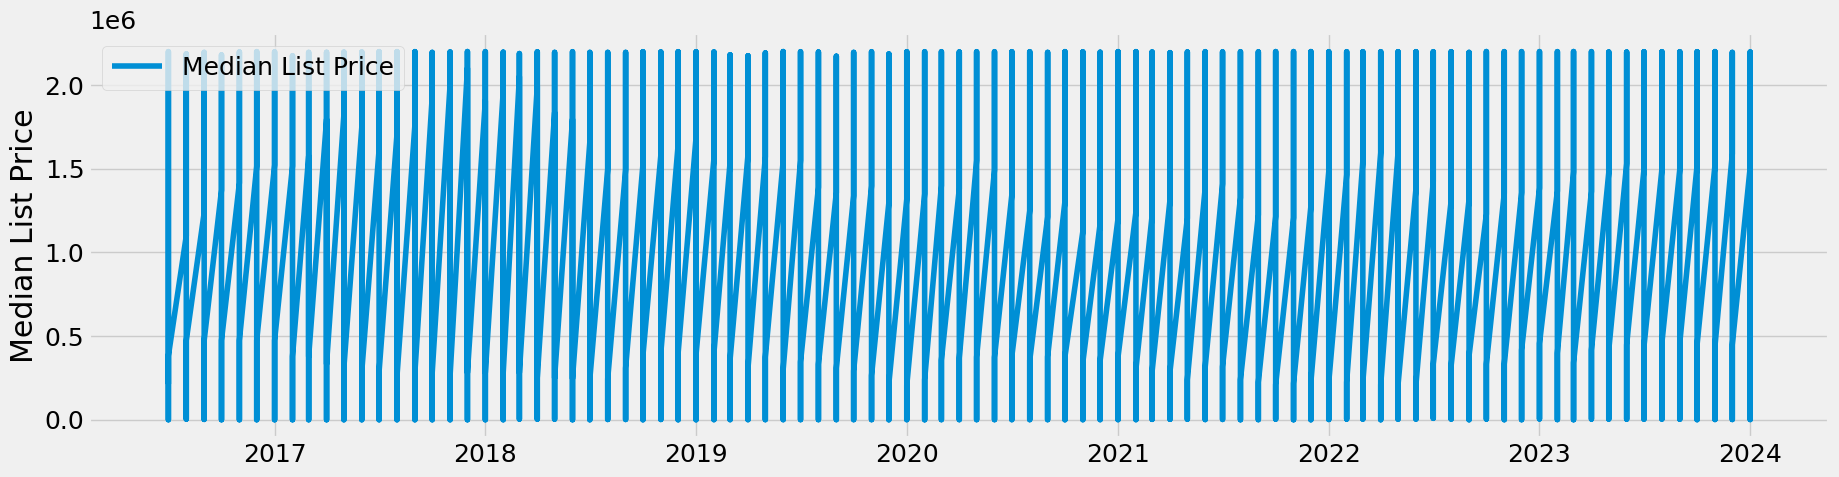

In [19]:
plt.rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize = (20,5))

ax.plot(by_zip['yyyy_mm'], by_zip['median_listing_price'], label = 'Median List Price')

ax.legend()
ax.set_ylabel('Median List Price')

plt.show()

In [20]:
# Check for missing values

by_zip.isnull().sum() 

yyyy_mm                 1
zipcode                 0
median_listing_price    0
dtype: int64

In [21]:
# View 1 missing values in yyyy_mm
df_nan = by_zip[by_zip['yyyy_mm'].isnull()==True]

In [22]:
df_nan

,yyyy_mm,zipcode,median_listing_price
2547839,NaT,please contact economics@realtor.com for more...,250000.0


In [23]:
# Drop the row with the missing Value - this row is for Realtor.com and not needed for my analysis. 
by_zip_cleaned = by_zip[by_zip['yyyy_mm'].isnull()==False]

In [24]:
by_zip_cleaned.shape

(2547839, 3)

In [25]:
# Check for missing values

by_zip_cleaned.isnull().sum() 

yyyy_mm                 0
zipcode                 0
median_listing_price    0
dtype: int64

In [26]:
# Set the 'Date' column as the index

from datetime import datetime

by_zip_cleaned['datetime'] = pd.to_datetime(by_zip_cleaned['yyyy_mm']) # Create a datetime column from 'yyyy_mm'
by_zip_cleaned = by_zip_cleaned.set_index('datetime') # Set the datetime as the index of the dataframe.
by_zip_cleaned.drop(['yyyy_mm'], axis=1, inplace=True) # Drop the 'yyyy_mm' column.
by_zip_cleaned.head()

,zipcode,median_listing_price
datetime,,
2016-07-01,01011,214000.0
2016-07-01,01030,249050.0
2016-07-01,01037,335000.0
2016-07-01,01057,262500.0
2016-07-01,01071,310000.0


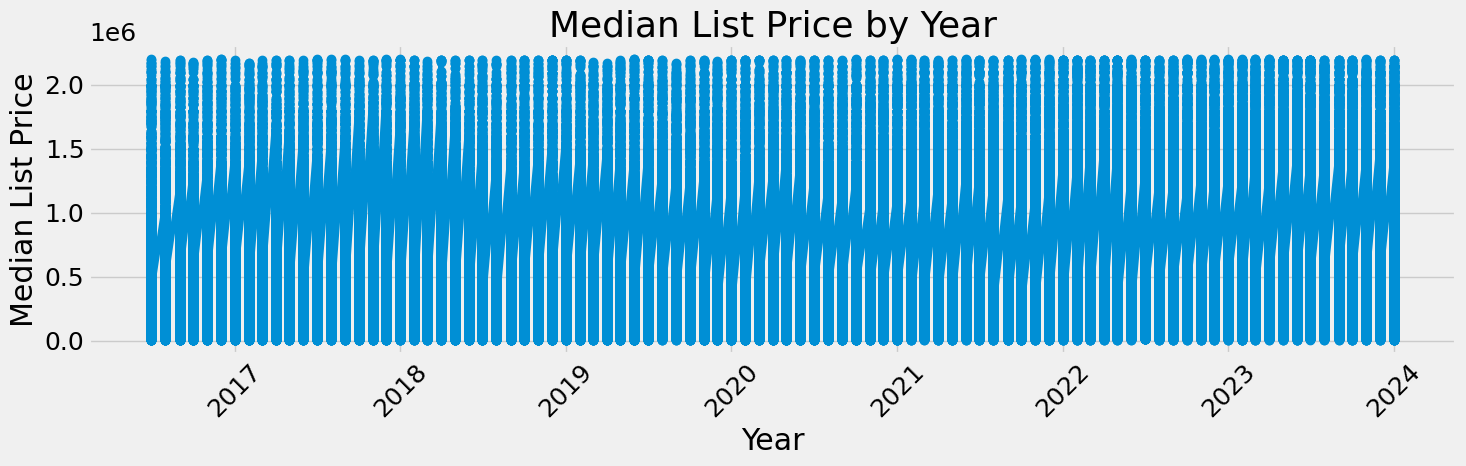

In [27]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(by_zip_cleaned.index, by_zip_cleaned['median_listing_price'], marker='o', linestyle='-')

plt.title('Median List Price by Year')
plt.xlabel('Year')
plt.ylabel('Median List Price')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

In [28]:
# Check for missing values

by_zip_cleaned.isnull().sum() 

zipcode                 0
median_listing_price    0
dtype: int64

### There are no missing values

In [29]:
# Check for duplicates

dups = by_zip_cleaned.duplicated()
dups.sum()

463980

In [30]:
dups

datetime
2016-07-01    False
2016-07-01    False
2016-07-01    False
2016-07-01    False
2016-07-01    False
              ...  
2024-01-01     True
2024-01-01     True
2024-01-01     True
2024-01-01     True
2024-01-01    False
Length: 2547839, dtype: bool

### Dups are from each city_state having each monthly value.

In [31]:
by_zip_cleaned.head()

,zipcode,median_listing_price
datetime,,
2016-07-01,01011,214000.0
2016-07-01,01030,249050.0
2016-07-01,01037,335000.0
2016-07-01,01057,262500.0
2016-07-01,01071,310000.0


In [32]:
by_zip_cleaned_resampled = by_zip_cleaned.resample('M')['median_listing_price'].agg(['median'])

In [33]:
by_zip_cleaned_resampled.head()

,median
datetime,
2016-07-31,188450.0
2016-08-31,187175.0
2016-09-30,187675.0
2016-10-31,187000.0
2016-11-30,187400.0


### 3. Time-series analysis: decomposition

In [34]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(by_zip_cleaned_resampled.asfreq('M'), model = 'additive')

In [35]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

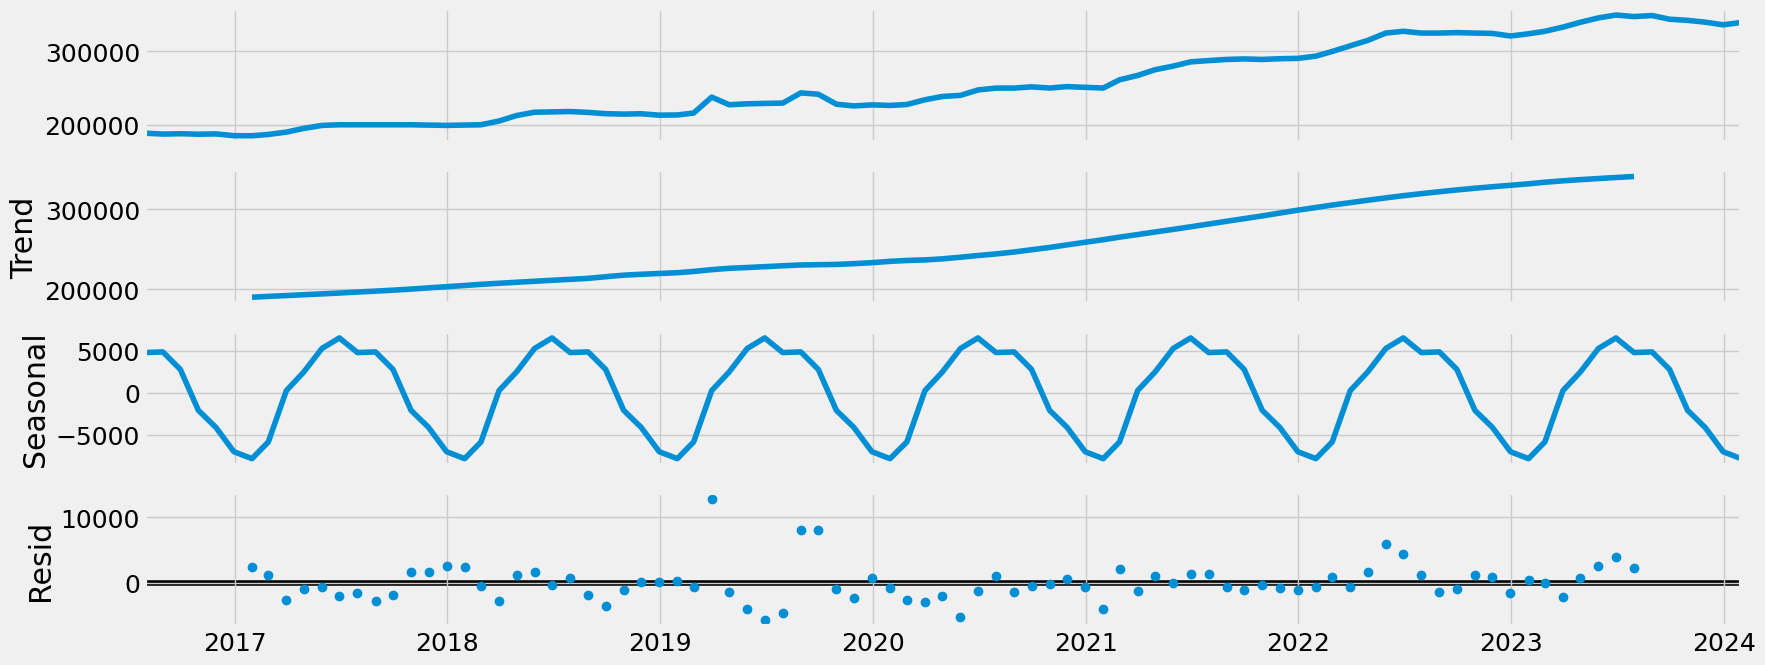

In [36]:
# Plot the separate components

decomposition.plot()
plt.show()

### The dominant trend in the chart above gradually increases in a linear fashion from 2016 - 2024 showing that real estate prices have increased over time. 
### Seasonal fluctuations represented by the curve that changes at a regular intervals. The dips represent the slower periods around the holidays and the fall/winter months when real estate sales tend to slow down and the peaks represent the spring and summer months when real estate sales increase. 
### The residual "noise" shows that there are fluctuation in price over the years. 

### 4. Testing for stationarity

In [37]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(by_zip_cleaned_resampled['median'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.012226
p-value                         0.959532
Number of Lags Used            12.000000
Number of Observations Used    78.000000
Critical Value (1%)            -3.517114
Critical Value (5%)            -2.899375
Critical Value (10%)           -2.586955
dtype: float64


### The p-value is not significant as it is not less than 0.05.
### The test statistic on 0.012226 is larger than critical value's which means that I can’t reject the null hypothesis. This also indicates that there is a unit root in my data, and my data is non-stationary.

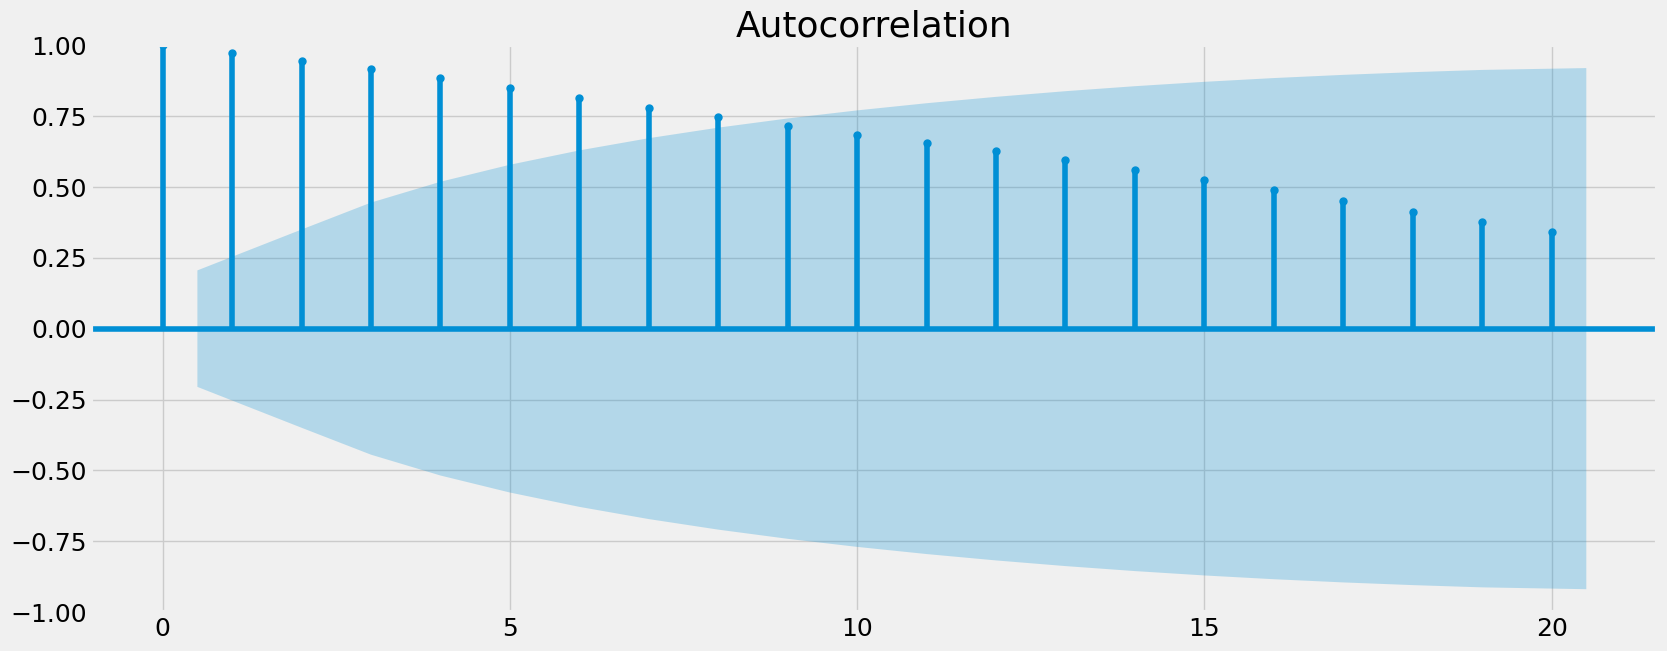

In [38]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(by_zip_cleaned_resampled)
plt.show()

### 5. Stationarizing the RDC_inventory_by_month_updated_1 Data

In [39]:
data_diff = by_zip_cleaned_resampled - by_zip_cleaned_resampled.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [40]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [41]:
data_diff.head()

,median
datetime,
2016-08-31,-1275.0
2016-09-30,500.0
2016-10-31,-675.0
2016-11-30,400.0
2016-12-31,-2400.0


In [42]:
data_diff.columns

Index(['median'], dtype='object')

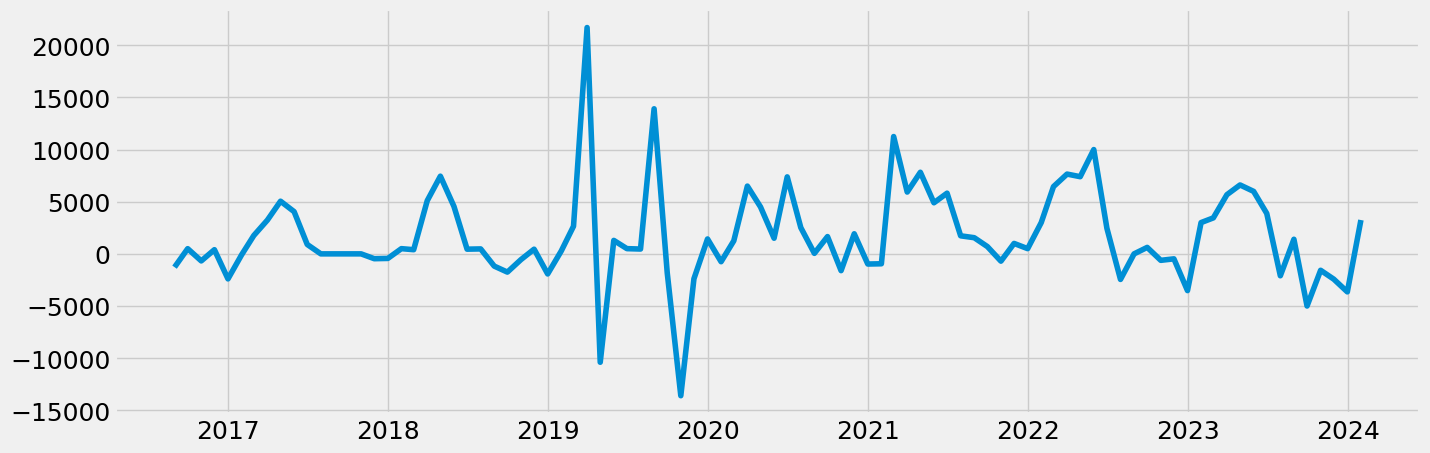

In [43]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [44]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.533843
p-value                         0.516708
Number of Lags Used            12.000000
Number of Observations Used    77.000000
Critical Value (1%)            -3.518281
Critical Value (5%)            -2.899878
Critical Value (10%)           -2.587223
dtype: float64


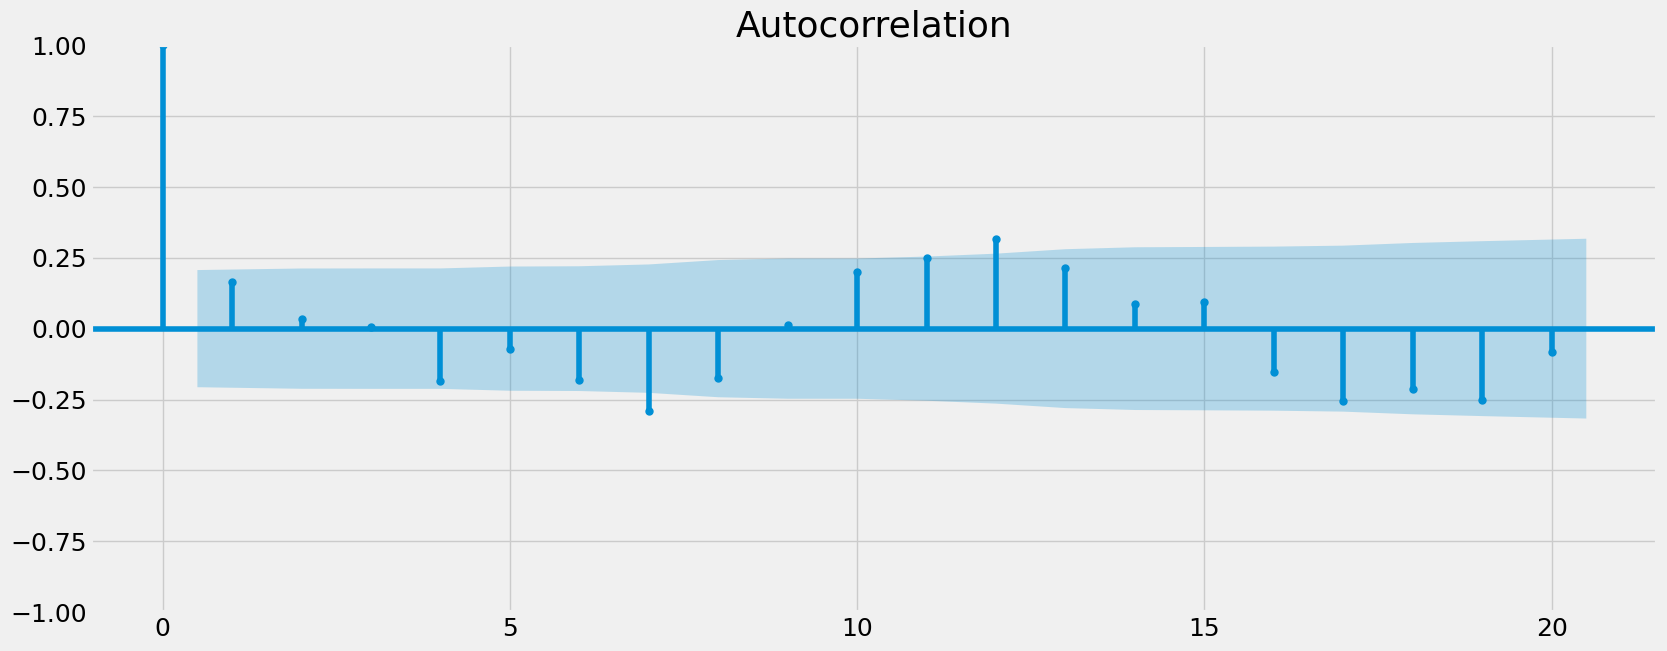

In [45]:
plot_acf(data_diff)
plt.show()

### The p-value is not significant as it is not less than 0.05.
### The test statistic of -1.533843 is larger than critical value's which means that I can’t reject the null hypothesis. This also indicates that there is a unit root in my data, and my data is non-stationary.
### I will repeat the dickey_fuller test again. 

In [46]:
data_diff_2 = data_diff - data_diff.shift(1)

In [47]:
data_diff_2.dropna(inplace = True)

In [48]:
data_diff_2.head()

,median
datetime,
2016-09-30,1775.0
2016-10-31,-1175.0
2016-11-30,1075.0
2016-12-31,-2800.0
2017-01-31,2300.0


In [49]:
data_diff_2.columns

Index(['median'], dtype='object')

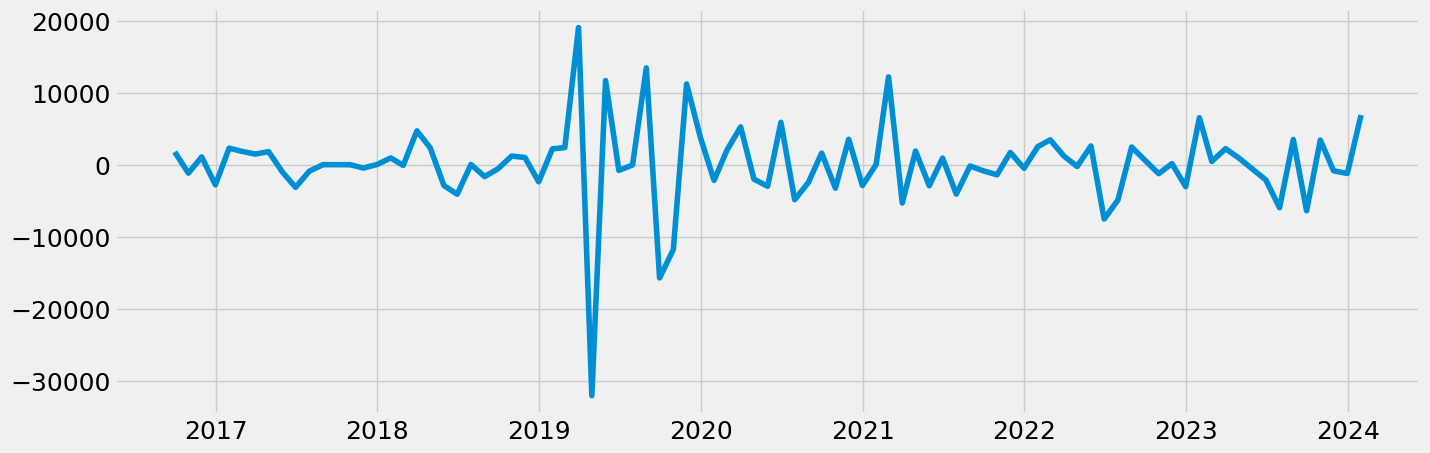

In [50]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [51]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -7.105685e+00
p-value                        4.059522e-10
Number of Lags Used            1.100000e+01
Number of Observations Used    7.700000e+01
Critical Value (1%)           -3.518281e+00
Critical Value (5%)           -2.899878e+00
Critical Value (10%)          -2.587223e+00
dtype: float64


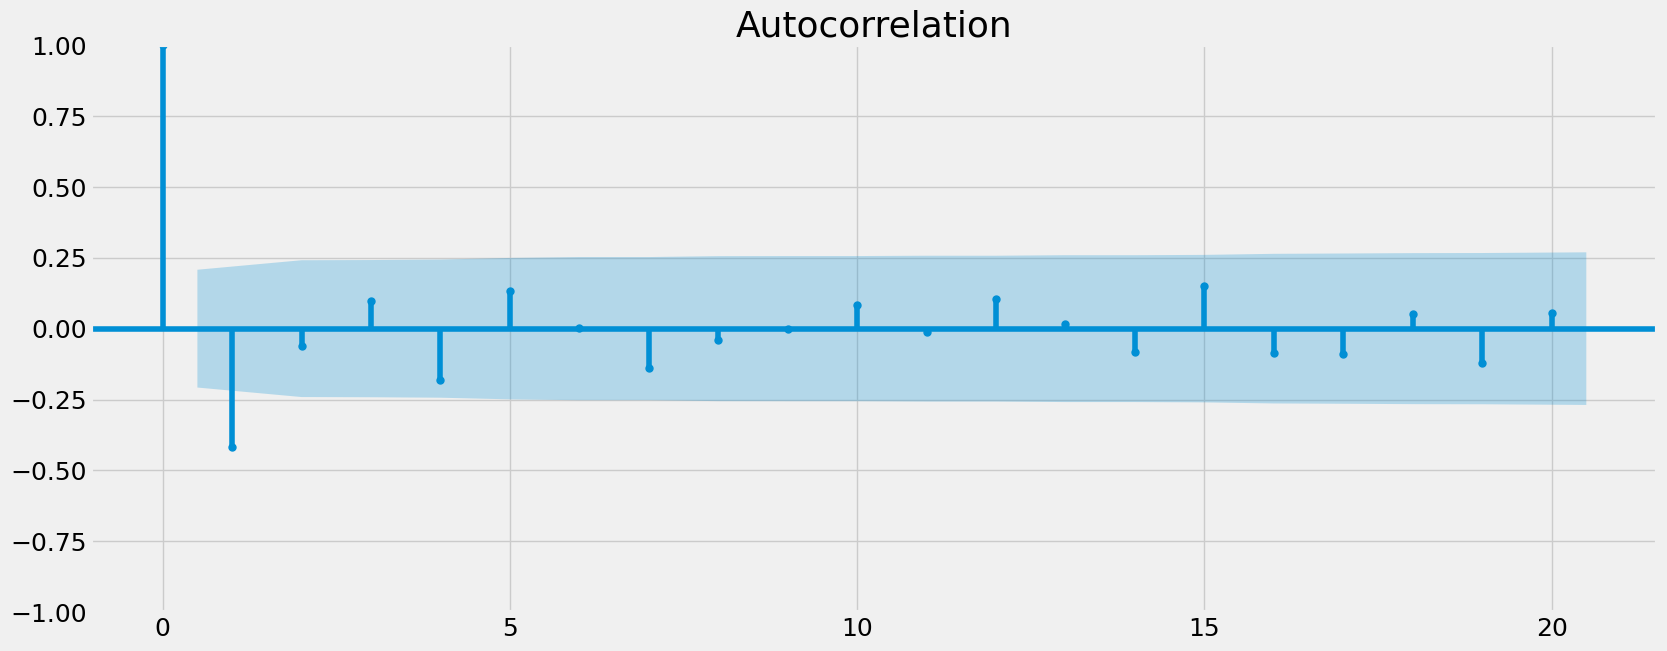

In [52]:
plot_acf(data_diff_2)
plt.show()

### The p-value is not significant as it is not less than 0.05.
### The test statistic of -7.105685e+00 is smaller than critical value's which means that I can reject the null hypothesis.

In [53]:
#Export my new dataframe as a pickle file
df_inventory_by_month_updated.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'RDC_inventory_by_month_updated_2.pkl'))

In [54]:
#Export my new dataframe as a csv for Tableau
df_inventory_by_month_updated.to_csv(os.path.join(path, '02 Data','Prepared Data', 'RDC_inventory_by_month_updated_2.csv'))

In [55]:
df_inventory_by_month_updated.head()

,yyyy_mm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,days_on_market_category
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,19.93114,96.0,824.0,74000.0,2.0,high_days_on_market
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,19.93114,29.0,947.0,130056.0,8.0,high_days_on_market
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.00000,178.0,907.0,207661.0,7.0,high_days_on_market
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.00000,91.0,903.0,84875.0,1.0,high_days_on_market
5,202401,71841,"gillham, ar",293750.0,2.0,25.0,2.0,0.0,0.0,19.93114,205.0,1532.0,306250.0,2.0,medium_days_on_market


In [56]:
df_inventory_by_month_updated.shape

(2547959, 15)